In [1]:
# Import the python library that connects to CoppeliaSim, the file is sim.py.
try:
    import sim
except:
    print('--------------------------------------------------------------')
    print('"sim.py" could not be imported. This means very probably that')
    print('either "sim.py" or the remoteApi library could not be found.')
    print('Make sure both are in the same folder as this file,')
    print('or appropriately adjust the file "sim.py"')
    print('--------------------------------------------------------------')
    print('')

import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print('Program started')
sim.simxFinish(-1)  # just in case, close all opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected to remote API server')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    sim.simxGetPingTime(clientID)

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')
print('Program ended')

Program started
Connected to remote API server
Program ended


In [3]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

Robot connected
Robot position: (7.62, 8.55) 


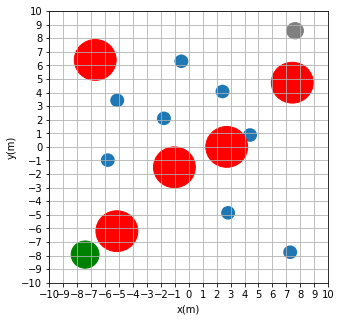

In [4]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot
# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

p1 = r.get_object_position('Cylinder5')
p2 = r.get_object_position('Cylinder6')
p3 = r.get_object_position('Cylinder7')
p4 = r.get_object_position('Cylinder8')
p5 = r.get_object_position('Cylinder9')
p6 = r.get_object_position('Cylinder10')
p7 = r.get_object_position('Cylinder11')
p8 = r.get_object_position('Cylinder12')
p9 = r.get_object_position('Cuboid0')
p10 = r.get_object_position('Cuboid1')
p11 = r.get_object_position('Cuboid3')
p12 = r.get_object_position('Cuboid4')
p13 = r.get_object_position('Cuboid6')
p14 = r.get_object_position('Sphere9')

fig, ax = plt.subplots(figsize=(5, 5))

a_circle1 = plt.Circle((p1[0], p1[1]), .5)
a_circle2 = plt.Circle((p2[0], p2[1]), .5)
a_circle3 = plt.Circle((p3[0], p3[1]), .5)
a_circle4 = plt.Circle((p4[0], p4[1]), .5)
a_circle5 = plt.Circle((p5[0], p5[1]), .5)
a_circle6 = plt.Circle((p6[0], p6[1]), .5)
a_circle7 = plt.Circle((p7[0], p7[1]), .5)
a_circle8 = plt.Circle((p8[0], p8[1]), .5)
a_circle9 = plt.Circle((p9[0], p9[1]), 1.5)
a_circle10 = plt.Circle((p10[0], p10[1]), 1.5)
a_circle11 = plt.Circle((p11[0], p11[1]),1.5)
a_circle12 = plt.Circle((p12[0], p12[1]), 1.5)
a_circle13 = plt.Circle((p13[0], p13[1]), 1.5)
a_circle14 = plt.Circle((p14[0], p14[1]), 1.0)
a_circle15 = plt.Circle((robot_position[0], robot_position[1]), .6)
a_circle9.set_color("red")
a_circle10.set_color("red")
a_circle11.set_color("red")
a_circle12.set_color("red")
a_circle13.set_color("red")
a_circle14.set_color("green")
a_circle15.set_color("gray")

ax.grid()
ax.set_xticks(numpy.arange(-10, 11, 1))
ax.set_yticks(numpy.arange(-10, 11., 1))
xlabel('x(m)')
ylabel('y(m)')
ax.add_artist(a_circle1)
ax.add_artist(a_circle2)
ax.add_artist(a_circle3)
ax.add_artist(a_circle4)
ax.add_artist(a_circle5)
ax.add_artist(a_circle6)
ax.add_artist(a_circle7)
ax.add_artist(a_circle8)
ax.add_artist(a_circle9)
ax.add_artist(a_circle10)
ax.add_artist(a_circle11)
ax.add_artist(a_circle12)
ax.add_artist(a_circle13)
ax.add_artist(a_circle14)
ax.add_artist(a_circle15)

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  313


Text(0, 0.5, 'y(m)')

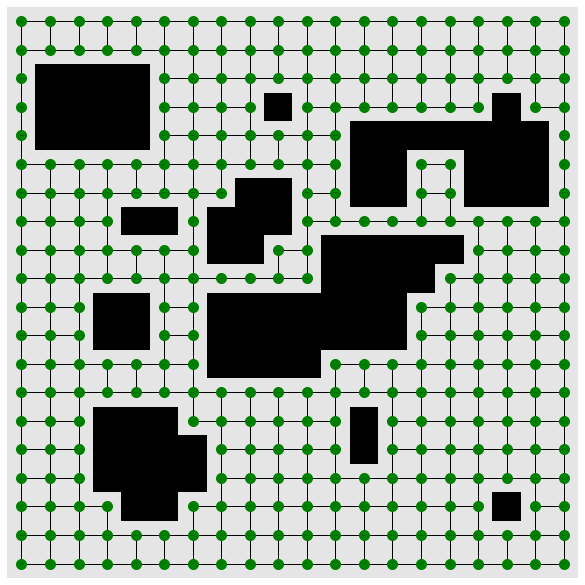

In [5]:
# import networkx as nx
# n, m = 20,20
# grid = np.zeros((20, 20))
# grid[3][3] =grid[4][3] =grid[3][5] =grid[3][4]=grid[4][4]=grid[4][5]=grid[2][4] =grid[2][5] = grid[5][4] =grid[5][5] =grid[3][6]=grid[4][6] =1
# grid[7][7] =grid[7][8] =grid[7][9] =grid[7][10]=grid[8][7]=grid[8][8]=grid[8][9] =grid[8][10] = grid[9][7] =grid[9][8] =grid[9][9]=grid[9][10] =1
# grid[8][11] =grid[8][12] =grid[8][13] =grid[9][11]=grid[9][12]=grid[9][13]=grid[10][11] =grid[10][12] = grid[10][13] =grid[11][11] =grid[11][12]=grid[11][13] =1
# grid[13][16] =grid[13][17] =grid[13][18] =grid[14][16]=grid[14][17]=grid[14][18]=grid[15][16] =grid[15][17] = grid[15][18] =grid[16][17] =grid[15][15]=1
# grid[15][1] =grid[15][2] =grid[15][3] =grid[15][4]=grid[16][1]=grid[16][2]=grid[16][3] =grid[16][4] = grid[17][1] =grid[17][2] =grid[17][4]=grid[17][3] =1
# grid[8][3] = grid[9][3] = grid[8][4] =grid[9][4]=1
# grid[12][4] = grid[12][5]=1
# grid[11][7] = grid[11][8] = grid[12][7] =grid[12][8]=1
# grid[13][12] = grid[14][12]=1
# grid[16][9]=1
# grid[10][14] = grid[11][14]=grid[11][15]= 1
# grid[4][12] =grid[5][12]=1
# grid[2][17] =1
# def draw_grid():
#     fig, ax = plt.subplots(figsize=(5, 5))
#     cmap = matplotlib.colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
#     ax.imshow(grid, cmap=cmap, origin='lower')
#     ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#     ax.set_xticks(np.arange(-0.5, n, 1));
#     ax.set_yticks(np.arange(-0.5, m, 1));
#     xticks(rotation=90)
    
    

# # This function automatically creates the graph in a grid.
# G = nx.grid_2d_graph(n, m) 
# print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# # Delete nodes with obstacles
# for i in range(n):
#     for j in range(m):
#         # if the node is an obstacle
#         if grid[i][j] == 1:  
#             G.remove_node((i,j))

# print("Number of nodes after removing obstacles: ",len(G.nodes()))
# draw_grid()
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# # Position of the nodes
# pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
# nx.draw(G, pos, font_size=1, with_labels=True, node_size=100, node_color="g")
# xlabel('x(m)')
# ylabel('y(m)')

import networkx as nx
import numpy as np

import networkx as nx
n, m = 20,20
grid = np.zeros((20, 20))
grid[3][3] =grid[4][3] =grid[3][5] =grid[3][4]=grid[4][4]=grid[4][5]=grid[2][4] =grid[2][5] = grid[5][4] =grid[5][5] =grid[3][6]=grid[4][6] =1
grid[7][7] =grid[7][8] =grid[7][9] =grid[7][10]=grid[8][7]=grid[8][8]=grid[8][9] =grid[8][10]  =1
grid[8][11] =grid[8][12] =grid[8][13] =grid[9][11]=grid[9][12]=grid[9][13]=grid[10][11] =grid[10][12] = grid[10][13] =grid[11][11] =grid[11][12]=grid[11][13] =1
grid[13][16] =grid[13][17] =grid[13][18] =grid[14][16]=grid[14][17]=grid[14][18]=grid[15][16] =grid[15][17] = grid[15][18] =grid[16][17] =grid[15][15]=1
grid[15][1] =grid[15][2] =grid[15][3] =grid[15][4]=grid[16][1]=grid[16][2]=grid[16][3] =grid[16][4] = grid[17][1] =grid[17][2] =grid[17][4]=grid[17][3] =1
grid[8][3] = grid[9][3] = grid[8][4] =grid[9][4]=1
grid[12][4] = grid[12][5]= grid[14][13]=grid[13][13]=1
grid[11][7] = grid[11][8] = grid[12][7] =grid[12][8]=1
grid[13][12] = grid[14][12]=1
grid[16][9]=grid[15][14]=1
grid[10][14] = grid[11][14]=grid[11][15]= 1
grid[4][12] =grid[5][12]=grid[13][8]=grid[13][9]=grid[12][9]=1
grid[2][17]= grid[15][12]=grid[15][13] = grid[9][7] =grid[9][8] =grid[9][9]=grid[9][10]= grid[5][3]=1
#grid[14][11]   =grid[11][10]    =grid[11][9]
def draw_grid():
    fig, ax = plt.subplots(figsize=(5, 5))
    cmap = matplotlib.colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, n, 1));
    ax.set_yticks(np.arange(-0.5, m, 1));
    xticks(rotation=90)
    
    

# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
draw_grid()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=1, with_labels=True, node_size=100, node_color="g")
xlabel('x(m)')
ylabel('y(m)')


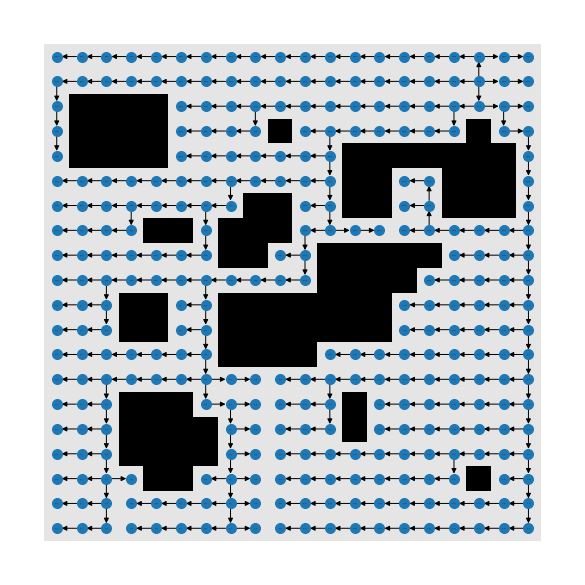

In [6]:
start_node= (18,17)
end_node=(2,3)

# G = nx.path_graph(6)
# print(G)
# H = nx.Graph()
# nx.add_path(H, [0, 1, 2, 3, 4, 5, 6])
# nx.add_path(H, [2, 7, 8, 9, 10])
bfs_tree =nx.bfs_tree(G, source=start_node)
draw_grid()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
nx.draw(bfs_tree, pos = pos,font_size=1, with_labels=True, node_size=100)

[(18, 17), (17, 17), (17, 16), (16, 16), (16, 15), (16, 14), (16, 13), (16, 12), (16, 11), (15, 11), (14, 11), (13, 11), (12, 11), (12, 10), (11, 10), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (9, 6), (8, 6), (7, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3)]


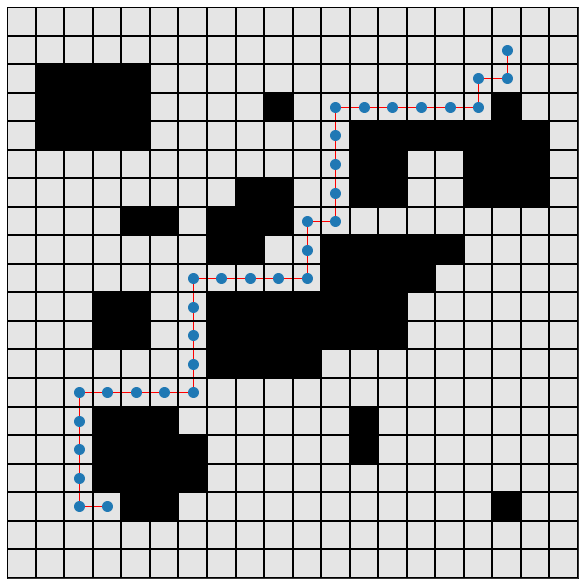

In [7]:
# Pick the last element and iterate through its predecessors
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]
draw_grid()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
nx.draw_networkx_nodes(path, pos, node_size=100)
nx.draw_networkx_edges(G, edgelist=E, pos=pos,edge_color='r',arrows=True,arrowsize=50)

In [8]:
def traject(rp, dp):
    tf = 1.5
    tstep = 0.05
    a0 = rp
    a1 = 0
    a2 = (3*dp-3*a0)/tf**2
    a3 = (2*a0-2*dp)/tf**3

    # Time interval
    time_steps = linspace(0, tf, int(tf/tstep))

    for t in time_steps:
        # Compute the trajectory
        traj_point = double(a0+a1*t+a2*(t**2)+a3*(t**3))
        vel_traj = double(3*a3*(t**2)+2*a2*t+a1)
        ref_point.set_position(traj_point)

        #print("Traj: ",traj_point)
        # Location sesing
        robot_position = r.get_position()
        #print("Robot: ",robot_position)

    
        # drive the robot using the trajectory tracker
        u = 5*(traj_point - robot_position) + vel_traj
#         u = vel_traj
        #print(u)
        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
        #print("Velocity: " ,-vy - vx, vy - vx, vy + vx, -vy + vx )
        time.sleep(tstep)


    
    r.send_motor_velocities([0, 0, 0, 0])

motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot    
# position = r.get_object_position("Sphere10")
ref_point = robot('Sphere10', client_id=r.client_id)


for p in range(len(path)):
    
#     robot_position = r.get_position()
#     print("Robot: ",robot_position)
    if(p==0):
        robot_position = r.get_position()

        desired_position = np.array(path[p])
        print("Before: ",desired_position)
        desired_position =  [(desired_position[1] -10,desired_position[0]-10,0)]
        print("After: ",desired_position)
        out = [item for t in desired_position for item in t] 
        out = np.array(out)
        traject(robot_position, out)
    else:
        position = np.array(path[p-1])
        print("Before 1: ",position)
        position =  [(position[1] -10,position[0]-10,0)]
        print("After 1: ",position)
        first = [item for t in position for item in t] 
        first = np.array(first)
        
        desired_position = np.array(path[p])
        print("Before: ",desired_position)
        desired_position =  [(desired_position[1] -10,desired_position[0]-10,0)]
        print("After: ",desired_position)
        out = [item for t in desired_position for item in t] 
        out = np.array(out)
        traject(first, out)
#     desired_position = np.array(path[p])
#     print("Before: ",desired_position)
#     desired_position =  [(desired_position[1] -10,desired_position[0]-10,0)]
#     print("After: ",desired_position)
#     out = [item for t in desired_position for item in t] 
#     out = np.array(out)
    print(out)
#     traject(robot_position, out)

Robot connected
Robot connected
Before:  [18 17]
After:  [(7, 8, 0)]
[7 8 0]
Before 1:  [18 17]
After 1:  [(7, 8, 0)]
Before:  [17 17]
After:  [(7, 7, 0)]
[7 7 0]
Before 1:  [17 17]
After 1:  [(7, 7, 0)]
Before:  [17 16]
After:  [(6, 7, 0)]
[6 7 0]
Before 1:  [17 16]
After 1:  [(6, 7, 0)]
Before:  [16 16]
After:  [(6, 6, 0)]
[6 6 0]
Before 1:  [16 16]
After 1:  [(6, 6, 0)]
Before:  [16 15]
After:  [(5, 6, 0)]
[5 6 0]
Before 1:  [16 15]
After 1:  [(5, 6, 0)]
Before:  [16 14]
After:  [(4, 6, 0)]
[4 6 0]
Before 1:  [16 14]
After 1:  [(4, 6, 0)]
Before:  [16 13]
After:  [(3, 6, 0)]
[3 6 0]
Before 1:  [16 13]
After 1:  [(3, 6, 0)]
Before:  [16 12]
After:  [(2, 6, 0)]
[2 6 0]
Before 1:  [16 12]
After 1:  [(2, 6, 0)]
Before:  [16 11]
After:  [(1, 6, 0)]
[1 6 0]
Before 1:  [16 11]
After 1:  [(1, 6, 0)]
Before:  [15 11]
After:  [(1, 5, 0)]
[1 5 0]
Before 1:  [15 11]
After 1:  [(1, 5, 0)]
Before:  [14 11]
After:  [(1, 4, 0)]
[1 4 0]
Before 1:  [14 11]
After 1:  [(1, 4, 0)]
Before:  [13 11]
After